# 주파수 특징 분석

## 개념

1. 정현파란?
    - 등속회전운동체의 위치를 시간에 대해 그린 파형을 갖는 신호
    - 진폭, 위상, 주파수로 정의 가능
2. 주기 = 1/주파수
3. 진폭 : 신호의 크기나 세기, 신호의 높이
4. 주기 : 하나의 싸이클을 반복하는 최소시간 간격

In [1]:
library(seewave)
library(pracma)
library(signal)
library(changepoint)


Attaching package: 'signal'


The following objects are masked from 'package:pracma':

    conv, ifft, interp1, pchip, polyval, roots


The following object is masked from 'package:seewave':

    unwrap


The following objects are masked from 'package:stats':

    filter, poly


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.



## spectrum = 주파수상에 진폭과 위상을 나타낸 것

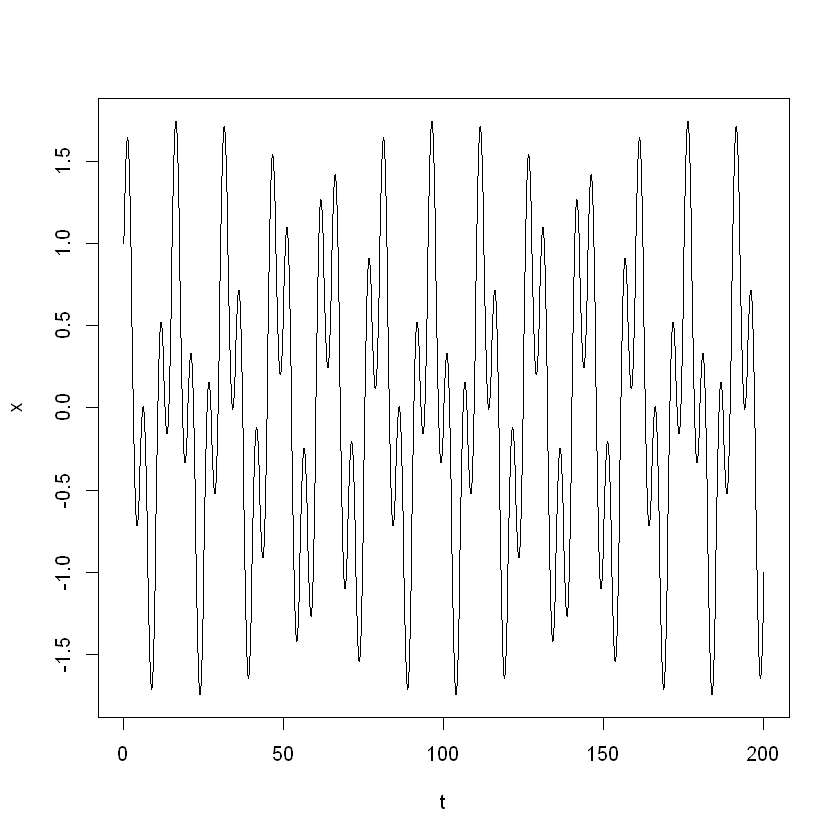

In [2]:
# 0.1초 단위로 신호 생성
t<-seq(0,200,by=0.1)
x<-cos(2*pi*t/16)+0.75*sin(2*pi*t/5)
plot(x=t,y=x,type='l')

$freq
   [1] 0.0004938272 0.0009876543 0.0014814815 0.0019753086 0.0024691358
   [6] 0.0029629630 0.0034567901 0.0039506173 0.0044444444 0.0049382716
  [11] 0.0054320988 0.0059259259 0.0064197531 0.0069135802 0.0074074074
  [16] 0.0079012346 0.0083950617 0.0088888889 0.0093827160 0.0098765432
  [21] 0.0103703704 0.0108641975 0.0113580247 0.0118518519 0.0123456790
  [26] 0.0128395062 0.0133333333 0.0138271605 0.0143209877 0.0148148148
  [31] 0.0153086420 0.0158024691 0.0162962963 0.0167901235 0.0172839506
  [36] 0.0177777778 0.0182716049 0.0187654321 0.0192592593 0.0197530864
  [41] 0.0202469136 0.0207407407 0.0212345679 0.0217283951 0.0222222222
  [46] 0.0227160494 0.0232098765 0.0237037037 0.0241975309 0.0246913580
  [51] 0.0251851852 0.0256790123 0.0261728395 0.0266666667 0.0271604938
  [56] 0.0276543210 0.0281481481 0.0286419753 0.0291358025 0.0296296296
  [61] 0.0301234568 0.0306172840 0.0311111111 0.0316049383 0.0320987654
  [66] 0.0325925926 0.0330864198 0.0335802469 0.0340740741

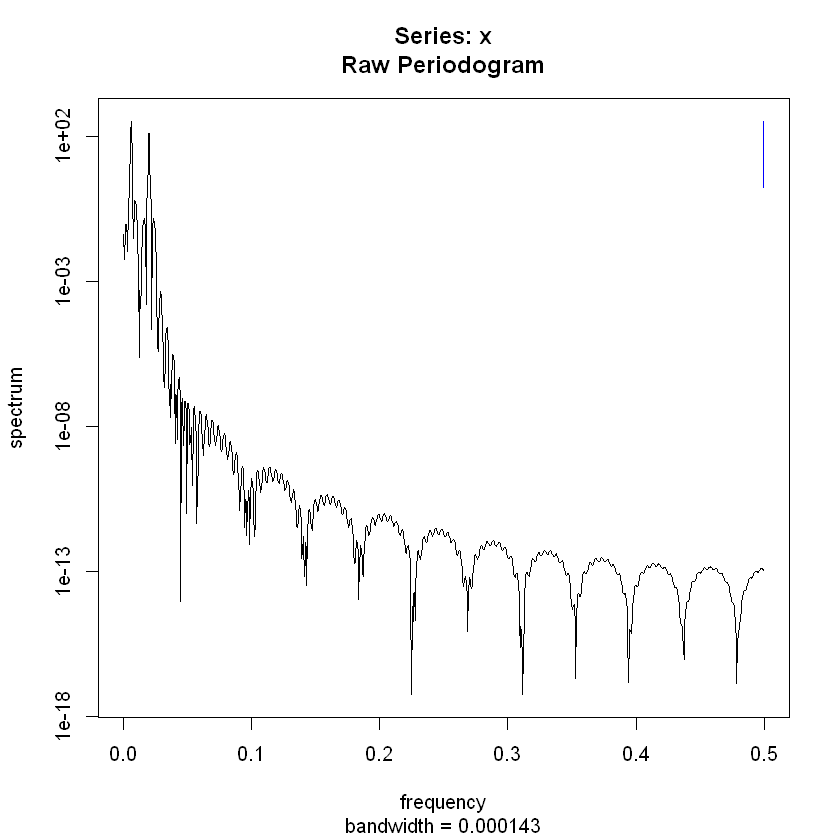

In [3]:
x.spec<-spectrum(x)
x.spec

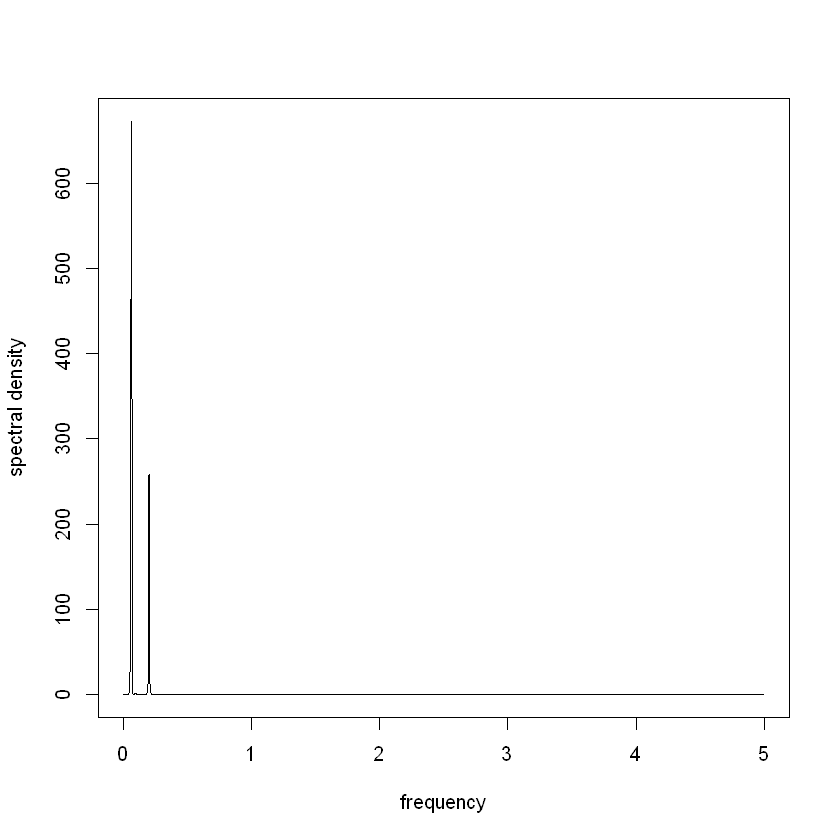

In [4]:
# 0.1초 단위로 데이터를 생성했으므로 주파수(frequency)도 0.1단위로 추출
# 주기 = 0.1 이니까 주파수 = 0.1의 역수
spx<-x.spec$freq*1/0.1

# 스펙트럼에 2를 곱해서 크기를 구함 -> why? 음수에 존재하는 영역도 구하기 위해서!
# spec : 진폭이지만 주파수 영역으로 간주
spy<-2*x.spec$spec

# y축~x축
plot(spy~spx, xlab='frequency', ylab='spectral density', type='l')

# spec에서 뽑아낸 fre는 시간을 고려하지 않은 값이기 때문에 0.1초를 곱해서 시간을 고려한 주파수 값을 구해주어야 한다.
# spec값은 시간단위를 고려하지않았으므로 시간단위를 맞춰주어야 한다
#  

# 스펙트럼 정리

- spectrum() 함수의 목적 : 각각의 주파수가 나타내는 상대적인 진폭의 크기, 주파수 값에 따라 나올 수 있는 진폭의 크기를 확률밀도함수에 적용해 연속값으로 나온 것임
- spectrum함수 적용한 변수의 spec값은 진폭 값(진폭의 크기)을 의미
- QnA : ``대체 spec(진폭의 크기)에다가 2를 곱하는건 무슨 이유 때문인 것인가....?``

### <질문>

1. 위상은 '시간'과 관계가 없다.
답은 here ~ https://m.blog.naver.com/lovejng/30188040863

In [5]:
# 상위 두개를 추출하여 변수화
spx[which(spy %in% sort(spy, decreasing=TRUE)[1:2])]

[1] 0.06419753 0.20246914